Karthick Ramasubramanian - KR33733

Bhavana Reddy - BC35833

Surya Prasad Reddy - SP49882

Sai Teja Reddy - SY22575

Charan Musunuru - CM59982

In [ ]:
# !pip install  decorator==4.3.0
# !pip install  networkx==2.3
# !pip install matplotlib==2.2.3

In [ ]:
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import accuracy_score

import networkx as nx

### Part 1

In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train.csv
Saving tweets.csv to tweets.csv


{'train.csv': b'Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3\r\n0,228,302,3,0.583979387611,0.100503358535,0.100503358535,0.100503358535,0.362150068203,2,166.5,11355,34463,29808,1689,15.4304976173,3.98402880489,8.20433119845,0.332423043719,6.98881495679,66,75.5303030303,1916.89393939\r\n0,21591,1179,228,90.4565058494,25.7982917525,5.70932864827,1.11115882218,5.17662002447,369,18.4429708223,1330.36604775,39262,848,1610,40.4950207027,8.9436069153,3.22767690032,0.564342728903,1.07032070863,163,132.030674847,2931.51533742\r\n0,7310,1215,101,25.5036444818,9.55634744251,5.36151928351,0.591205606947,3.58971842047,95,68.9278350515,5999.89690722,3622,482,206,0

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

Choice  A_follower_count  ...  B_network_feature_2  B_network_feature_3
0       0               228  ...            75.530303          1916.893939
1       0             21591  ...           132.030675          2931.515337
2       0              7310  ...            10.333333           277.333333
3       0                20  ...            23.469296          1395.845634
4       1             45589  ...            48.500000          1993.627907

[5 rows x 23 columns]

In [ ]:
df.describe()

Choice  A_follower_count  ...  B_network_feature_2  B_network_feature_3
count  5500.000000      5.500000e+03  ...          5500.000000          5500.000000
mean      0.509455      6.498840e+05  ...            85.024196          3745.175480
std       0.499956      2.028787e+06  ...           106.689384          5518.399590
min       0.000000      1.600000e+01  ...             0.000000             0.000000
25%       0.000000      2.663750e+03  ...            15.176568          1206.500000
50%       1.000000      4.558900e+04  ...            54.925234          2206.420734
75%       1.000000      3.927380e+05  ...           112.191489          4349.908608
max       1.000000      3.654319e+07  ...          1861.583333         75526.083333

[8 rows x 23 columns]

In [ ]:
def preprocessing1(data,type_):
    
    data = data.fillna(0.0)
    
    data = data.astype(float)
    
    data_ratiod = pd.DataFrame(columns = ['follower_count','following_count','listed_count','mentions_received'
                                         ,'retweets_received','mentions_sent','retweets_sent','posts',
                                        'network_feature_1','network_feature_2','network_feature_3']).fillna(0.0)
    
    
    if type_ == 1:
        
        for i in range(0,11):
            if math.isinf(data[data.columns.values[i+1]]/data[data.columns.values[i+1+11]]):
                data_ratiod[data_ratiod.columns.values[i]] = 100000000
            else:
                data_ratiod[data_ratiod.columns.values[i]] = data[data.columns.values[i+1]]/data[data.columns.values[i+1+11]]
            
    if type_ == 2:
        
        for i in range(0,11):
            data_ratiod[data_ratiod.columns.values[i]] = data[data.columns.values[i+1]]-data[data.columns.values[i+1+11]]    
  
        
    scaler = MinMaxScaler()
    data_ratiod = pd.DataFrame(scaler.fit_transform(data_ratiod),columns = data_ratiod.columns.values)

    data_ratiod['Choice'] = data['Choice']   
    
    return data_ratiod
        
        
    

In [ ]:
data_ratiod = preprocessing1(df,2)

In [ ]:
data_ratiod

follower_count  following_count  ...  network_feature_3  Choice
0           0.507400         0.347553  ...           0.386341     0.0
1           0.507632         0.363888  ...           0.335476     0.0
2           0.507932         0.364108  ...           0.369221     0.0
3           0.507606         0.354055  ...           0.336865     0.0
4           0.508414         0.363242  ...           0.346725     1.0
...              ...              ...  ...                ...     ...
5495        0.497178         0.363058  ...           0.352861     0.0
5496        0.507871         0.363577  ...           0.326474     1.0
5497        0.507990         0.363138  ...           0.348811     0.0
5498        0.507074         0.343235  ...           0.312159     0.0
5499        0.500816         0.362509  ...           0.400325     0.0

[5500 rows x 12 columns]

In [ ]:
X = data_ratiod.drop(columns=['Choice'])
y = data_ratiod['Choice']

y = y.astype('category')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
lr = LogisticRegression()

scores = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print("Accuracy CV data: ",(np.mean(scores)))

Accuracy CV data:  0.6843636363636364


In [ ]:
lr = LogisticRegression().fit(X_train,y_train)
pred = lr.predict(X_test)

importance = lr.coef_[0]

importance_dict = {}

for i in range(len(X_train.columns.values)):
    importance_dict[X_train.columns.values[i]] = importance[i]

sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

[('follower_count', 6.394189782246612),
 ('listed_count', 4.993805690643357),
 ('retweets_sent', 4.011597599704416),
 ('network_feature_2', 3.2930422071280345),
 ('network_feature_3', 2.604044853773607),
 ('network_feature_1', 2.0984482502958732),
 ('following_count', 1.9467179789397322),
 ('mentions_sent', 1.6948789820286216),
 ('posts', 1.3836025370202645),
 ('retweets_received', 0.5381834556411912),
 ('mentions_received', 0.4302514869291201)]

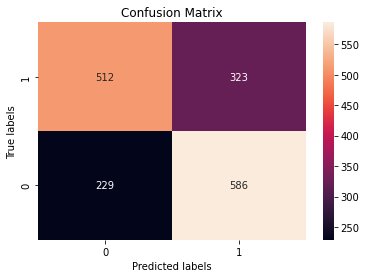

In [ ]:
pred = lr.predict(X_test)
cm = confusion_matrix(y_test, pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['1', '0']);

#### XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

param_grid = {
        'n_estimators': [10, 50, 100, 500, 1000],
        'max_depth': [1,3,5,7]
}

xgb = XGBClassifier(verbosity = 0)

CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)

CV_xgb.fit(X_train, y_train)

CV_xgb.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [ ]:
xgb=XGBClassifier(bootstrap=True, max_depth=3, n_estimators=50)


xgb.fit(X_train, y_train)
pred_xgb=xgb.predict(X_test)

print("Accuracy for XGBoost on CV data: ",accuracy_score(y_test,pred))

Accuracy for XGBoost on CV data:  0.6654545454545454


Text(0.5, 0, 'XGBoost Feature Importance')

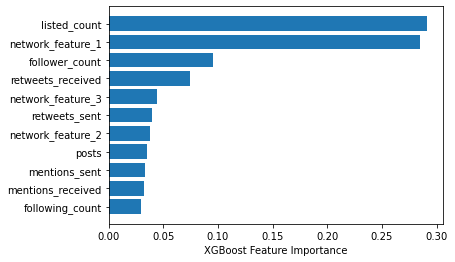

In [ ]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [500, 100],
    'max_features': [3, 5, 7, 9],
    'n_estimators': [100, 500, 1000,2000] }

## Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

KeyboardInterrupt: 

In [ ]:
rf=RandomForestClassifier(bootstrap=True, 
                       max_depth=1000, max_features=3,n_estimators=100)

rf.fit(X_train, y_train)
pred_rf=rf.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6654545454545454


Text(0.5, 0, 'Random Forest Feature Importance')

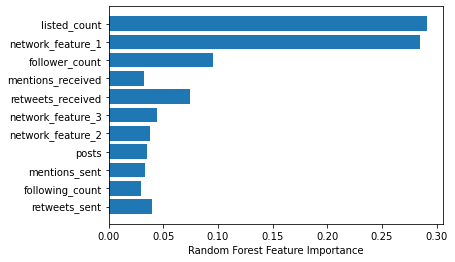

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Confusion Matrix

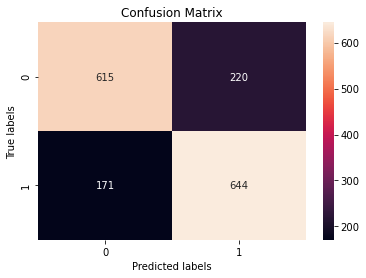

In [ ]:
cm = confusion_matrix(y_test, pred_xgb)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

#### Financial value of Model

In [ ]:
# Assuming all rows are unique influencers
# All tweets are for a product

In [ ]:
# Without Model

tweet = (sum(df['A_follower_count']) + sum(df['B_follower_count']))
retweet = (sum(df['A_follower_count']*df['A_retweets_sent']) + sum(df['B_follower_count']*df['B_retweets_sent']))
total_buys = tweet*0.0001  + retweet*0.00005

cost_tweet = len(df)*5*2
cost_retweet = (sum(df['A_retweets_sent']) + sum(df['B_retweets_sent']))*5
cost = cost_tweet + cost_retweet

In [ ]:
# With Model

tweet = 0
retweet = 0


for i in range(len(df)):
    if df.loc[i,'Choice'] == 0:
        tweet = tweet + df.loc[i,'B_follower_count']
        retweet = retweet + df.loc[i,'B_follower_count']*df.loc[i,'B_retweets_sent']
        
        
    if df.loc[i,'Choice'] == 1:
        tweet = tweet + df.loc[i,'A_follower_count']
        retweet = retweet + df.loc[i,'A_follower_count']*df.loc[i,'A_retweets_sent']
        

total_buys2 = (tweet*0.0001 + retweet*0.00005)*0.68

cost2 = len(df)*10

In [ ]:
total_buys2/cost2

12.446116704819051

In [ ]:
total_buys/cost

11.685878510735604

### Part 2

In [ ]:
tweets = pd.read_csv('tweets.csv')
tweets = tweets[['username','retweeted_username','content_type']]

In [ ]:
tweets.head()

username    retweeted_username       content_type
0               Adam Clark        NWS Fort Worth                 RT
1               Adam Clark        NWS Fort Worth                 RT
2               Adam Clark        NWS Fort Worth                 RT
3  Starr County Town Crier       NWS Brownsville                 RT
4     Plano, Texas Weather  Plano, Texas Weather  Tweet (self-loop)

In [ ]:
tweets['username'].value_counts()

J. A. Q.                                             203
SachseWx                                             203
Lake Alan Henry Weather                              138
Plano, Texas Weather                                 122
William Cole🌪                                         85
                                                    ... 
lalo 1600                                              1
TexasAmerica                                           1
B SHEETS                                               1
TASTY'S Live Sponsor of ChiLo Radio and ChiTalkTV      1
Pohakanten Studios                                     1
Name: username, Length: 1231, dtype: int64

In [ ]:
array = []

for i in range(len(tweets)):
    array.append((tweets.loc[i,'username'],tweets.loc[i,'retweeted_username']))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib.pyplot import figure
figure(figsize=(25, 25))


G = nx.Graph()

for i in range(len(tweets)):
    G.add_edge(tweets.loc[i,'username'],tweets.loc[i,'retweeted_username'])   

<Figure size 1800x1800 with 0 Axes>

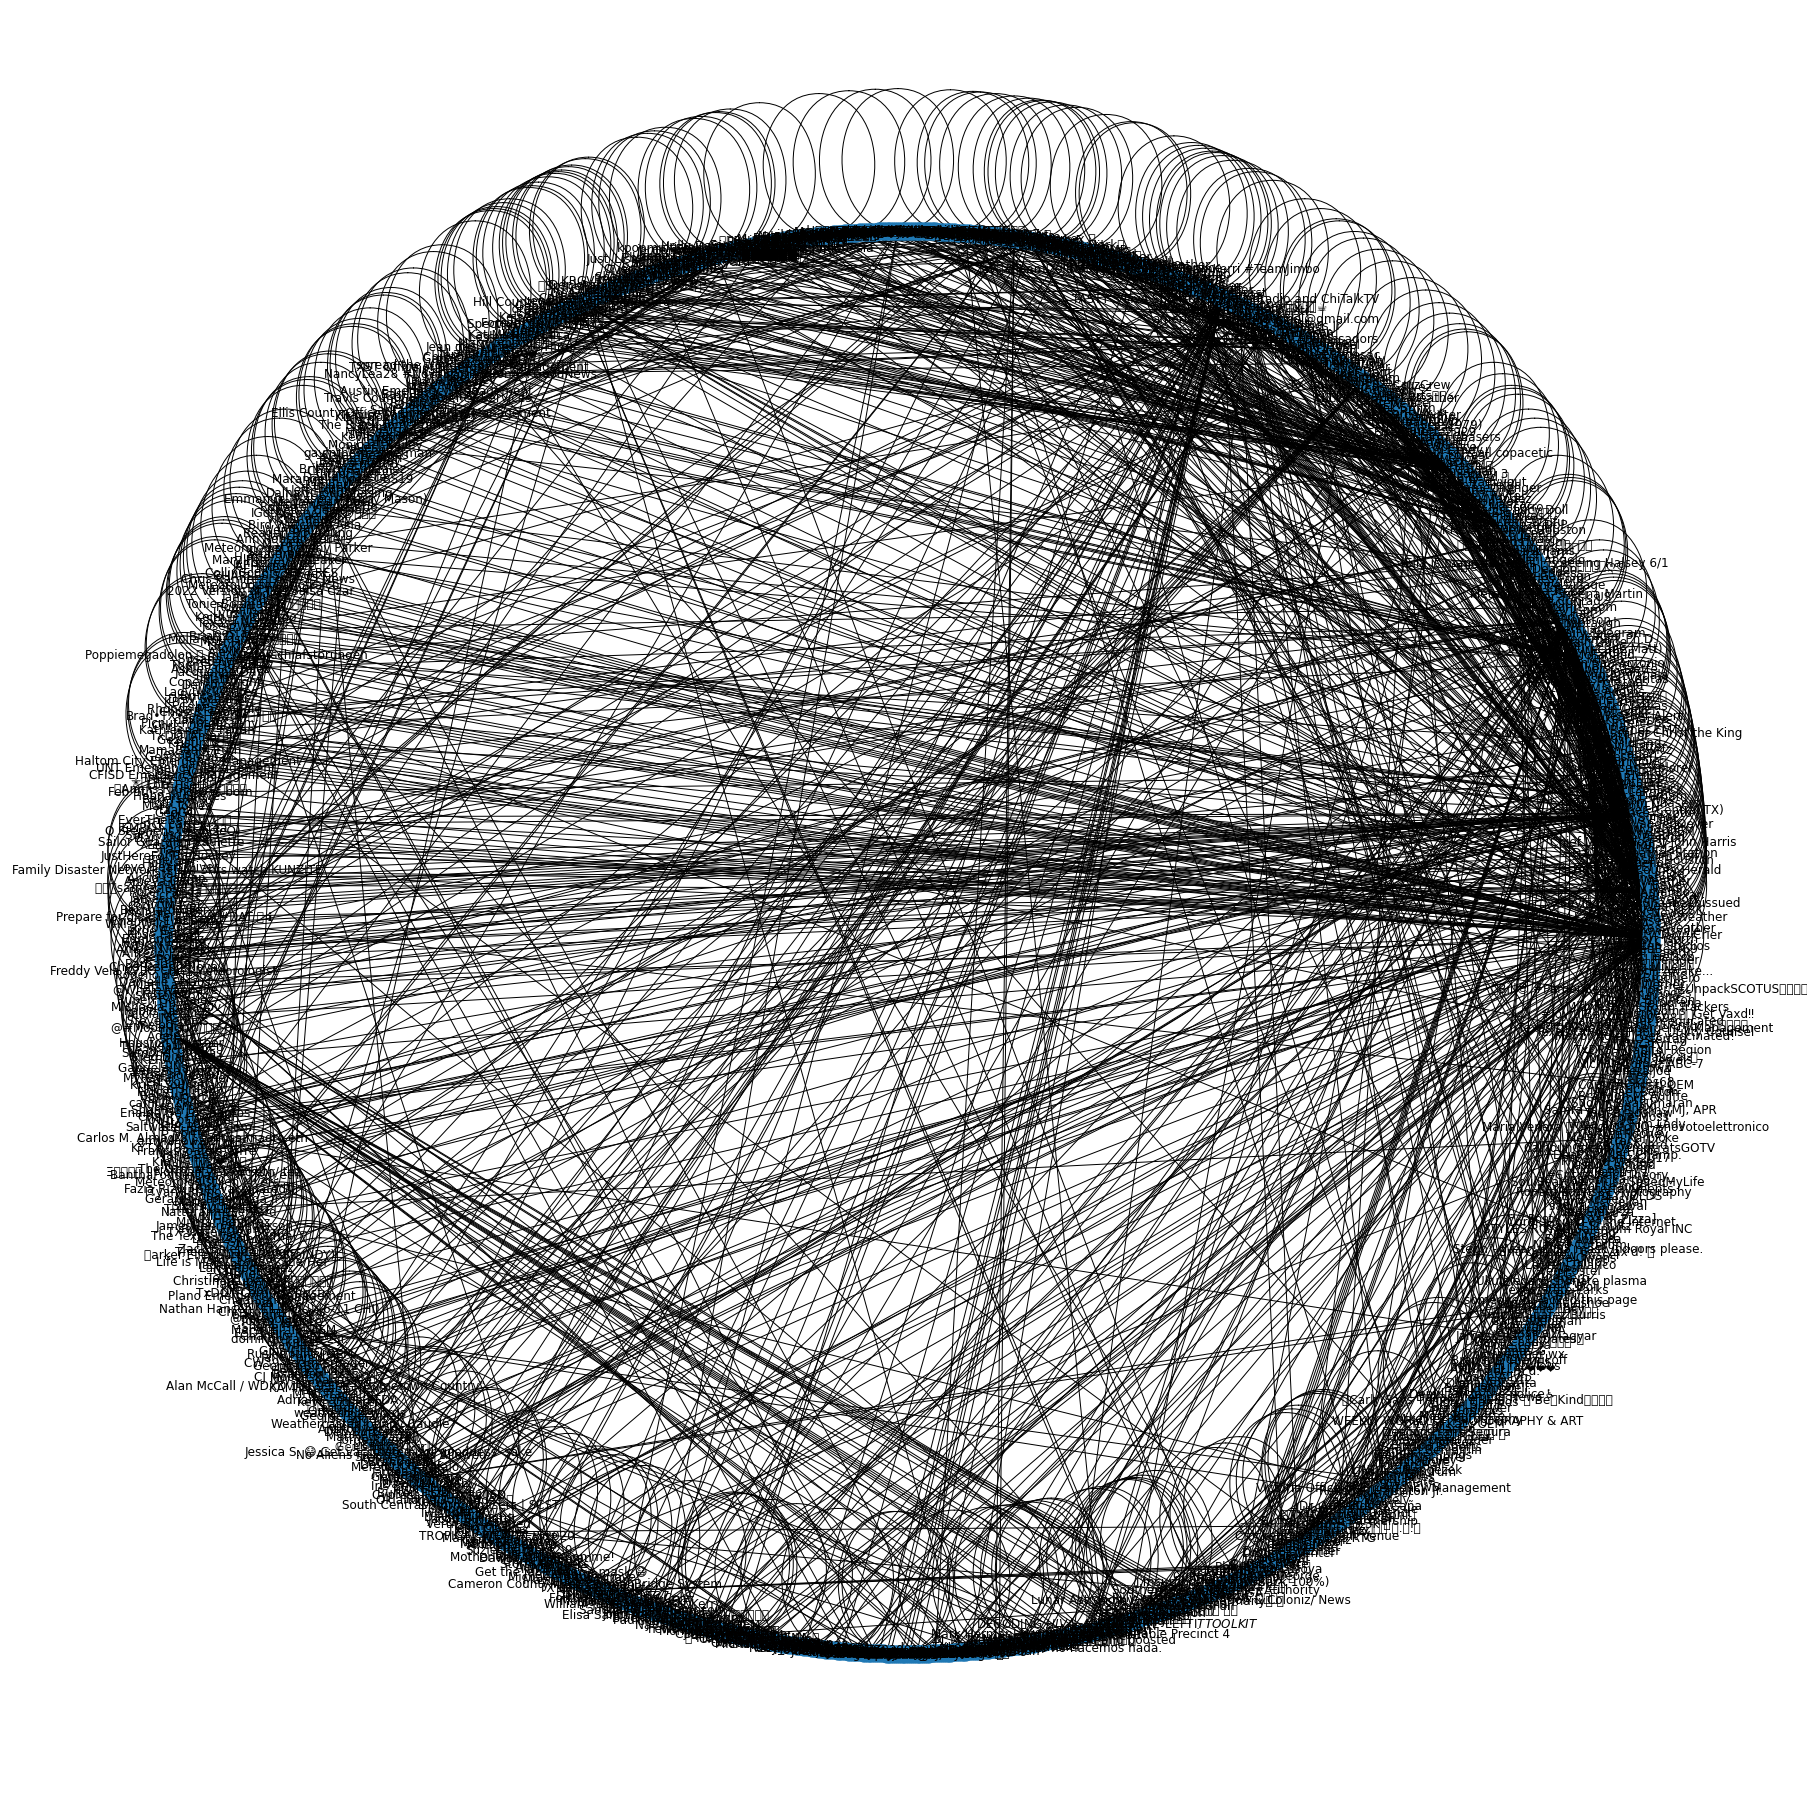

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(25, 25))
nx.draw_circular(G, with_labels = True)

In [ ]:
unique_connections = tweets[['username','retweeted_username']].drop_duplicates()
unique_connections

username         retweeted_username
0                    Adam Clark             NWS Fort Worth
3       Starr County Town Crier            NWS Brownsville
4          Plano, Texas Weather       Plano, Texas Weather
5                      J. A. Q.                   J. A. Q.
6                      SachseWx                   SachseWx
...                         ...                        ...
4377            Garett Trietsch            Garett Trietsch
4385  Midwestern Storm Trackers  Midwestern Storm Trackers
4389               TxDOT Laredo               Wes Rapaport
4391             AStuffedBear69             NWS Fort Worth
4392         Pohakanten Studios       Storm Chaser Houston

[1578 rows x 2 columns]

In [ ]:
pd.crosstab(unique_connections['username'], unique_connections['retweeted_username'], rownames =[ 'username'], colnames=['retweeted_username'])

retweeted_username                         A.J. Harrel🌪  ...  🎙LoriGrace.crypto
username                                                 ...                   
"MissBeautyBliss 23"                                  0  ...                  0
#CriticalRaceTheory_                                  0  ...                  0
#JoyfulBeTheJourney🌹 💉💉Get Vaxd‼️                     0  ...                  0
#StormHour                                            0  ...                  0
#ThePhotoHour                                         0  ...                  0
...                                                 ...  ...                ...
👑 BueyNas Noches Lex 🤘                                0  ...                  0
💉💉💉samreciter 🏞️🦋🇸🇻🌋💎🤲                                0  ...                  1
💗jacqui🌹                                              0  ...                  0
💛Carly Says Things💛 #RESIST 🌊 Be💗Kind🌄🌏💚🌍             0  ...                  0
🕊Ann is RIGHT🕊 🦅🇺🇸🇨🇦                                  0  ...                  0

[1231 rows x 283 columns]

In [ ]:
df_temp = tweets[['username','retweeted_username']]
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()


In [ ]:
df_temp3.nunique()

username              1242
retweeted_username    1242
dtype: int64

In [ ]:
df = pd.crosstab(df_temp3['username'],df_temp3['retweeted_username'], rownames=['username'], colnames =['retweeted_username'])

In [ ]:
len(df.columns.values)

1242

In [ ]:
for i in range(len(df)):
    for j in range(len(df)):
        if df.iloc[i,j] > 0:
            df.iloc[i,j] = 1
        if i == j:
            df.iloc[i,j] = 1 

In [ ]:
df.to_csv('tweets_matrix.csv')
#df = pd.read_csv('tweets_matrix.csv')

In [ ]:
df

retweeted_username                         "MissBeautyBliss 23"  ...  🕊Ann is RIGHT🕊 🦅🇺🇸🇨🇦
username                                                         ...                      
"MissBeautyBliss 23"                                          1  ...                     0
#CriticalRaceTheory_                                          0  ...                     0
#JoyfulBeTheJourney🌹 💉💉Get Vaxd‼️                             0  ...                     0
#StormHour                                                    0  ...                     0
#ThePhotoHour                                                 0  ...                     0
...                                                         ...  ...                   ...
👑 BueyNas Noches Lex 🤘                                        0  ...                     0
💉💉💉samreciter 🏞️🦋🇸🇻🌋💎🤲                                        0  ...                     0
💗jacqui🌹                                                      0  ...                     0
💛Carly Says Things💛 #RESIST 🌊 Be💗Kind🌄🌏💚🌍                     0  ...                     0
🕊Ann is RIGHT🕊 🦅🇺🇸🇨🇦                                          0  ...                     1

[1242 rows x 1242 columns]

In [ ]:
mat = np.matrix(df)

In [ ]:
mat.shape

(1242, 1242)

In [ ]:
G=nx.from_numpy_matrix(mat)
betweeness_dict = nx.centrality.betweenness_centrality(G,weight='weight')

In [ ]:
nx.centrality.betweenness_centrality(G,weight='weight')

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.024537305009223593,
 4: 0.0,
 5: 0.0,
 6: 0.006158859920459566,
 7: 0.0,
 8: 0.004295747930736637,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0031531273630720537,
 20: 0.050855792113412034,
 21: 0.019580803151432534,
 22: 0.00023208692142361409,
 23: 0.0,
 24: 0.0019566899909694603,
 25: 0.0,
 26: 0.0,
 27: 1.9495204179771776e-05,
 28: 0.014959322148244008,
 29: 0.0,
 30: 0.0,
 31: 0.004494328092727654,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.007616566551327805,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.00806008732860022,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0029346780691949723,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.003782502837635275,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0012619895505705597,
 66: 0.08175910113413049,
 67: 0.0,
 68: 0.0,
 69: 0.014551484611831164

In [ ]:
# Betweeness score
a=dict(nx.centrality.betweenness_centrality(G,weight='weight'))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
#myvalues=a.get(mykeys)
df.columns.values[mykeys]

array(['NWS Fort Worth', 'NWS Houston', 'Texas Storm Chasers',
       'NWS Shreveport', 'Hill Country Weather - Cary Burgess',
       'Andrew Hatter', 'NWS Brownsville', 'Storm Chaser Houston',
       'NWS Austin/San Antonio', 'Billy Forney 3', 'A xxx A',
       'KHOU 11 News Houston', 'Travis Herzog', 'TK Moniker',
       '🎙LoriGrace.crypto'], dtype=object)

In [ ]:
G.degree

DegreeView({0: 3, 1: 3, 2: 3, 3: 9, 4: 3, 5: 3, 6: 4, 7: 3, 8: 4, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 3, 19: 4, 20: 16, 21: 22, 22: 4, 23: 3, 24: 4, 25: 3, 26: 3, 27: 6, 28: 13, 29: 3, 30: 3, 31: 4, 32: 3, 33: 3, 34: 3, 35: 2, 36: 9, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 12, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 7, 52: 3, 53: 3, 54: 3, 55: 3, 56: 3, 57: 3, 58: 3, 59: 2, 60: 3, 61: 8, 62: 3, 63: 3, 64: 3, 65: 4, 66: 14, 67: 3, 68: 3, 69: 9, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3, 88: 2, 89: 3, 90: 3, 91: 3, 92: 22, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 99: 3, 100: 3, 101: 4, 102: 4, 103: 3, 104: 5, 105: 3, 106: 3, 107: 3, 108: 4, 109: 36, 110: 3, 111: 3, 112: 3, 113: 3, 114: 3, 115: 3, 116: 2, 117: 2, 118: 3, 119: 3, 120: 3, 121: 3, 122: 4, 123: 4, 124: 3, 125: 2, 126: 3, 127: 6, 128: 3, 129: 12, 130: 2, 131: 3, 132: 3, 133: 2, 134: 3, 135: 3, 13

In [ ]:
# Degree Score
a = dict(G.degree)
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df.columns.values[mykeys]

array(['NWS Fort Worth', 'NWS Houston', 'Texas Storm Chasers',
       'NWS Shreveport', 'NWS Austin/San Antonio', 'KHOU 11 News Houston',
       '🎙LoriGrace.crypto', 'Billy Forney 3', 'Travis Herzog',
       'Storm Chaser Houston', 'Jonah Lange', 'NWS Corpus Christi',
       'NWS Amarillo', 'NWS Brownsville', 'Dan Henry'], dtype=object)

In [ ]:
df

retweeted_username                         "MissBeautyBliss 23"  ...  🕊Ann is RIGHT🕊 🦅🇺🇸🇨🇦
username                                                         ...                      
"MissBeautyBliss 23"                                          1  ...                     0
#CriticalRaceTheory_                                          0  ...                     0
#JoyfulBeTheJourney🌹 💉💉Get Vaxd‼️                             0  ...                     0
#StormHour                                                    0  ...                     0
#ThePhotoHour                                                 0  ...                     0
...                                                         ...  ...                   ...
👑 BueyNas Noches Lex 🤘                                        0  ...                     0
💉💉💉samreciter 🏞️🦋🇸🇻🌋💎🤲                                        0  ...                     0
💗jacqui🌹                                                      0  ...                     0
💛Carly Says Things💛 #RESIST 🌊 Be💗Kind🌄🌏💚🌍                     0  ...                     0
🕊Ann is RIGHT🕊 🦅🇺🇸🇨🇦                                          0  ...                     1

[1242 rows x 1242 columns]

In [ ]:
# Closeness Score
nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)

{0: 0.18313895166681948,
 1: 0.18296289884137673,
 2: 0.1331191855357525,
 3: 0.18491829537988064,
 4: 0.12912290062397702,
 5: 0.18313895166681948,
 6: 0.17708970041380986,
 7: 0.14074849733388217,
 8: 0.1884893840254936,
 9: 0.1669170405785943,
 10: 0.18313895166681948,
 11: 0.18313895166681948,
 12: 0.16340601461235643,
 13: 0.1269059213333837,
 14: 0.18296289884137673,
 15: 0.00826463356680923,
 16: 0.13522355631953262,
 17: 0.17586246756270932,
 18: 0.18296289884137673,
 19: 0.18999466485624372,
 20: 0.2062049355576838,
 21: 0.20642858516241014,
 22: 0.15977095951290002,
 23: 0.12289081873752519,
 24: 0.19157237596350493,
 25: 0.1332123573191546,
 26: 0.18313895166681948,
 27: 0.0032903572387859253,
 28: 0.16754151014061808,
 29: 0.15742527338274787,
 30: 0.12310941495455509,
 31: 0.17692508065976495,
 32: 0.18313895166681948,
 33: 0.1669170405785943,
 34: 0.12912290062397702,
 35: 0.0,
 36: 0.15078404081579888,
 37: 0.19171710452756702,
 38: 0.00826463356680923,
 39: 0.0008058017

In [ ]:
a = dict(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df.columns.values[mykeys]

array(['Texas Storm Chasers', 'Hill Country Weather - Cary Burgess',
       'Andrew Hatter', 'NWS Fort Worth', 'NWS Houston', 'Billy Forney 3',
       'NWS Brownsville', 'NWS Shreveport', 'TROPICAL WEATHER 2020',
       'NWS Amarillo', 'Chase Benton', 'Storm Chaser Houston',
       'NWS Corpus Christi', 'WatchStorms.com', 'NWS Austin/San Antonio'],
      dtype=object)

In [ ]:
tweets = pd.read_csv('tweets.csv')
tweets1 = tweets[['username','followers_count','friends_count','retweet_count']].drop_duplicates()
tweets1.columns.values

array(['username', 'followers_count', 'friends_count', 'retweet_count'],
      dtype=object)

In [ ]:
#tweets1['retweet_count'].value_counts()
  
scaler = MinMaxScaler()
temp=tweets1[['followers_count','friends_count','retweet_count']]
temp = pd.DataFrame(scaler.fit_transform(temp),columns = temp.columns.values)
tweets1[['followers_count','friends_count','retweet_count']]=temp[['followers_count','friends_count','retweet_count']]

In [ ]:
tweets1['influence_score']=None
tweets1['influence_score']=tweets1['followers_count']*importance_dict['follower_count']+tweets1['friends_count']*importance_dict['following_count']+tweets1['retweet_count']*importance_dict['retweets_received']


In [ ]:
tweets1.sort_values('influence_score',ascending=False)[['username','influence_score']][0:15]

username  influence_score
295                             Love061309         6.417929
208                        Karen L. Fields         2.530276
466                        NWS Brownsville         2.513499
1566                        Force Thirteen         2.510146
783    Hill Country Weather - Cary Burgess         2.510144
1780            Plano Emergency Management         2.509475
913                       North FL AMS/NWA         2.509473
853                     Chikage Windler WX         2.508802
926                             Daren 💉💉💉🎉         2.507460
1568                 Temple Daily Telegram         2.506791
860   spread the wonder (or perish)~☆ﾟ.*･｡         2.506789
1720                           Local23News         2.506120
1026                         Marina Neuman         2.505447
1044                             J Weather         2.044957
1298               Lake Alan Henry Weather         2.044286

In [ ]:
importance_dict

{'follower_count': 6.394189782246612,
 'following_count': 1.9467179789397322,
 'listed_count': 4.993805690643357,
 'mentions_received': 0.4302514869291201,
 'mentions_sent': 1.6948789820286216,
 'network_feature_1': 2.0984482502958732,
 'network_feature_2': 3.2930422071280345,
 'network_feature_3': 2.604044853773607,
 'posts': 1.3836025370202645,
 'retweets_received': 0.5381834556411912,
 'retweets_sent': 4.011597599704416}